In [1]:
import pandas
import copy

from matplotlib import pyplot
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
# Make the graphs a bit prettier, and bigger
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
source_file = './Titanic.csv'

table = pandas.read_csv(source_file, index_col=0)
table.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


We know about 1313 passengers of Titanic, moreover there are NaN values only within "Age" column.

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1 to 1313
Data columns (total 6 columns):
Name        1313 non-null object
PClass      1313 non-null object
Age         756 non-null float64
Sex         1313 non-null object
Survived    1313 non-null int64
SexCode     1313 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 71.8+ KB


How many people survived: 34.27%

In [4]:
table['Survived'].mean()

0.3427265803503427

How many women survived: 66.66%

In [5]:
table[table['Sex'] == 'female']['Survived'].mean()

0.6666666666666666

How many men survived: 16.68%

In [6]:
table[table['Sex'] == 'male']['Survived'].mean()

0.16686251468860164

Info about passenger classes: amount of survived people (in percents too) and the appropriate percentage of survived people towards all passengers.

In [7]:
amount_of_all_survived = len(table[table['Survived'] == 1])

for pclass in table['PClass'].unique():
    class_data = table[table['PClass'] == pclass]
    survived_col = class_data['Survived']
    amount_of_survived = len(survived_col[survived_col == 1])
    
    print(10*'=', pclass, 10*'=')
    print('Amount of people:', len(class_data))
    print('Survived:', amount_of_survived)
    print('Percent of survived:', survived_col.mean() * 100)
    print('Percent of all survived people:', amount_of_survived / amount_of_all_survived * 100)

========== 1st ==========
Amount of people: 322
Survived: 193
Percent of survived: 59.93788819875776
Percent of all survived people: 42.888888888888886
========== 2nd ==========
Amount of people: 279
Survived: 119
Percent of survived: 42.65232974910394
Percent of all survived people: 26.444444444444443
========== * ==========
Amount of people: 1
Survived: 0
Percent of survived: 0.0
Percent of all survived people: 0.0
========== 3rd ==========
Amount of people: 711
Survived: 138
Percent of survived: 19.40928270042194
Percent of all survived people: 30.666666666666664


The code below prepares data to answer on the following two questions:
  * percentage of survived people by age decade
  * dependency between passenger class and age decade

In [8]:
table2 = copy.deepcopy(table[['PClass', 'Age', 'Survived']])
table2 = table2.dropna()
table2['AgeDecade'] = table2['Age'] // 10 * 10
table2.head()

,PClass,Age,Survived,AgeDecade
1,1st,29.00,1,20.0
2,1st,2.00,0,0.0
3,1st,30.00,0,30.0
4,1st,25.00,0,20.0
5,1st,0.92,1,0.0


In [9]:
table3 = table2[['AgeDecade', 'Survived']].groupby('AgeDecade').sum()
table3['Survived'] = table3['Survived'] / amount_of_all_survived * 100
table3

,Survived
AgeDecade,
0.0,8.222222
10.0,9.777778
20.0,18.666667
30.0,15.555556
40.0,9.555556
50.0,5.777778
60.0,2.000000
70.0,0.000000


Percentage sum is less than 100, because we removed passengers with undefined age (NaN values)

In [10]:
table3.sum()

Survived    69.555556
dtype: float64

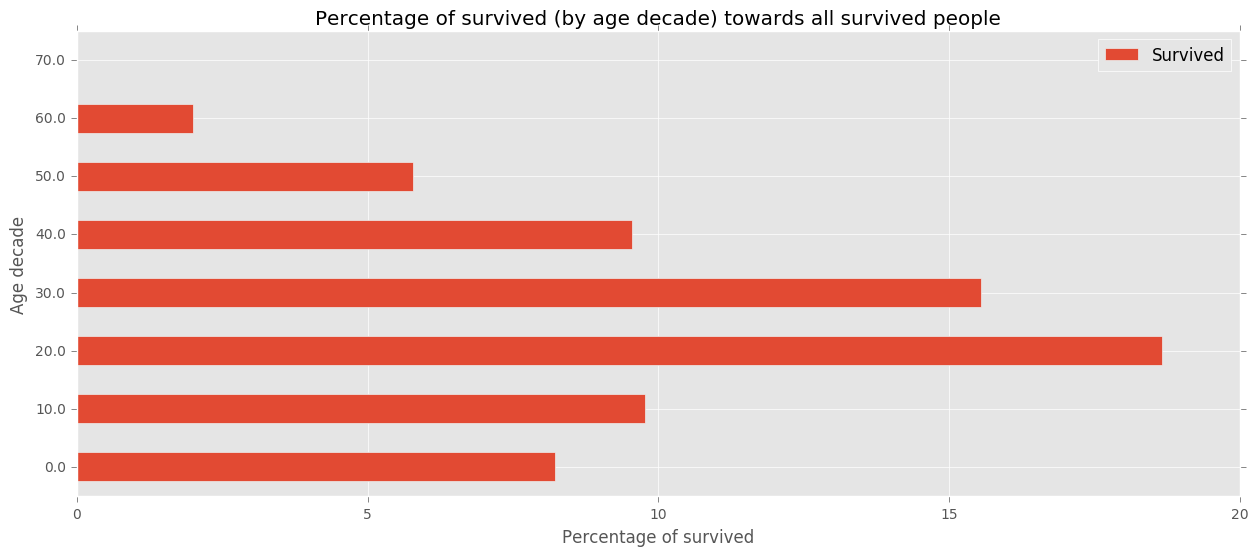

In [11]:
table3.plot(kind='barh')
pyplot.xlabel('Percentage of survived')
pyplot.ylabel('Age decade')
pyplot.title('Percentage of survived (by age decade) towards all survived people')

Plot a dependency between passenger class and age decade

In [12]:
pclass1_pas_num = []
pclass2_pas_num = []
pclass3_pas_num = []
for decade in table3.index:
    pclass1_pas_num.append(len(table2[(table2['PClass'] == '1st') & (table2['AgeDecade'] == decade)]))
    pclass2_pas_num.append(len(table2[(table2['PClass'] == '2nd') & (table2['AgeDecade'] == decade)]))
    pclass3_pas_num.append(len(table2[(table2['PClass'] == '3rd') & (table2['AgeDecade'] == decade)]))

In [13]:
table3['1st'] = pclass1_pas_num
table3['2nd'] = pclass2_pas_num
table3['3rd'] = pclass3_pas_num

table3

,Survived,1st,2nd,3rd
AgeDecade,,,,
0.0,8.222222,4,20,29
10.0,9.777778,18,23,55
20.0,18.666667,41,74,137
30.0,15.555556,50,56,62
40.0,9.555556,51,24,31
50.0,5.777778,39,13,2
60.0,2.000000,20,1,2
70.0,0.000000,3,1,0


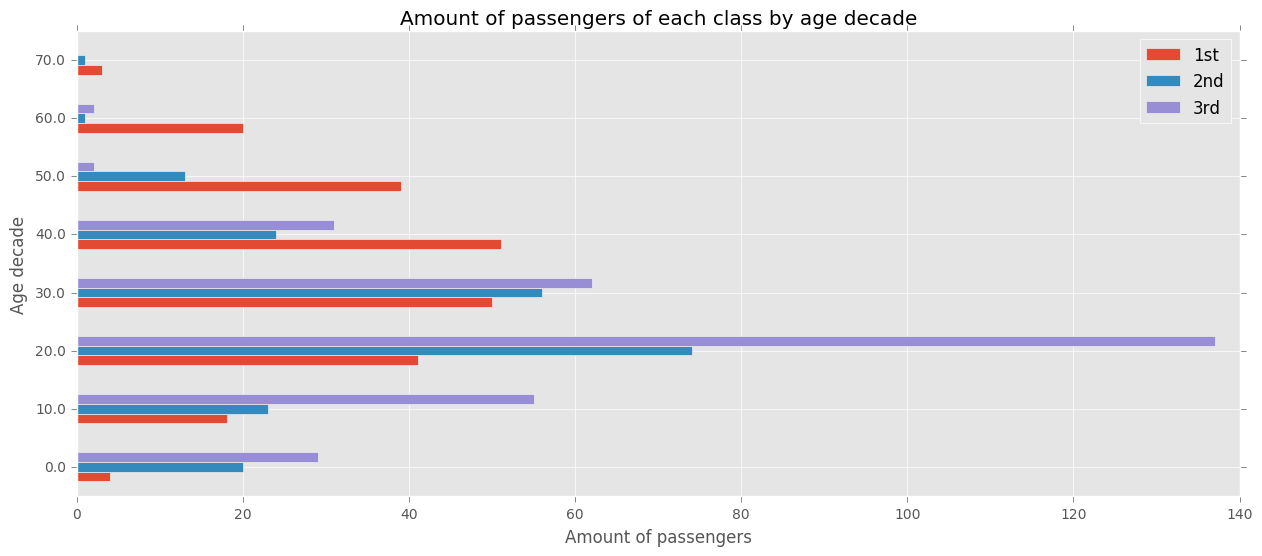

In [14]:
table3[['1st', '2nd', '3rd']].plot(kind='barh')
pyplot.xlabel('Amount of passengers')
pyplot.ylabel('Age decade')
pyplot.title('Amount of passengers of each class by age decade')